In [1]:
import numpy as np
from bold_deconvolution import ridge_regress_deconvolution, ridge_deconvolution
from scipy import io
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

Две функции ridge_regress_deconvolution, ridge_deconvolution. Вторая - полная калька со скрипта, в первой убрала обращение к nilearn и sklearn, только numpy и scipy

In [2]:
#setUP
data = io.loadmat('./data/03_BD_Sub_01_ROI_01.mat')  # Example BOLD signal of length 100
BOLD = data['preproc_BOLD_signal']
spm_neuro = data['spm_phys_neuro'].squeeze()
TR = 0.72  # Example time repetition
alpha = 0.005
NT = 16

Text(0.5, 0, 'Time points (TR = 2 s)')

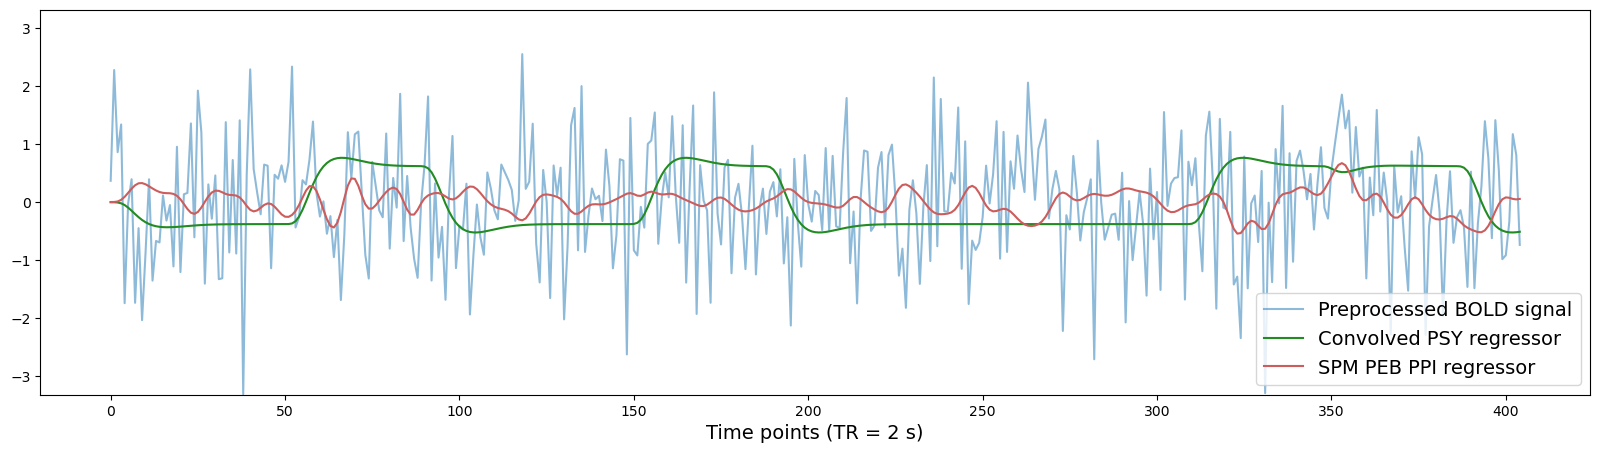

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(BOLD, label='Preprocessed BOLD signal', alpha=0.5)
plt.plot(data['psy_convolved'], c='forestgreen', label='Convolved PSY regressor')
plt.plot(data['spm_ppi'], c='indianred', label='SPM PEB PPI regressor')
plt.legend(fontsize=14)
plt.ylim(-1.3 * np.max(data['preproc_BOLD_signal']), 1.3 * np.max(data['preproc_BOLD_signal']))
plt.xlabel('Time points (TR = 2 s)', fontsize=14)

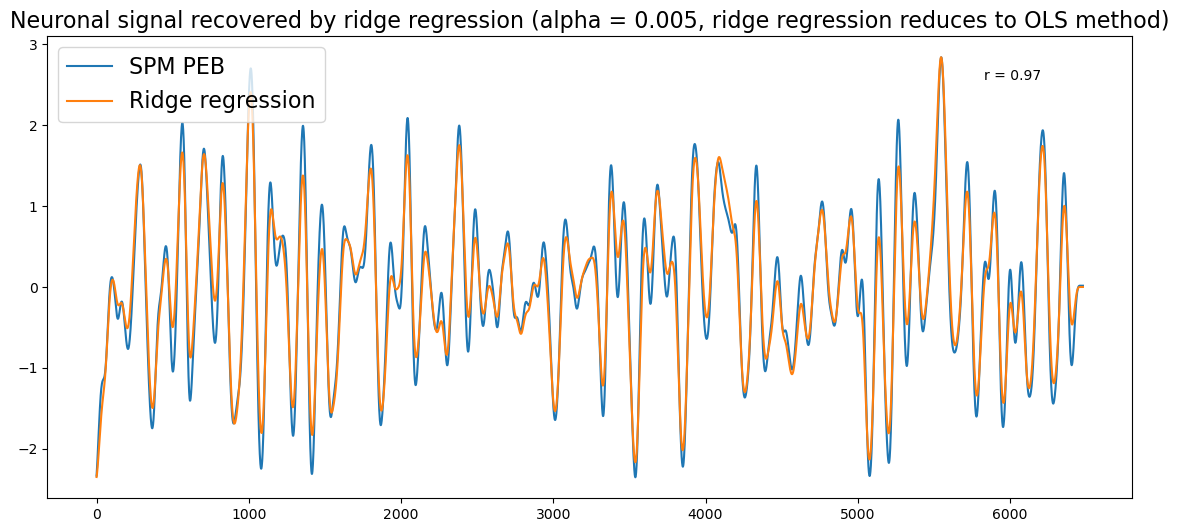

In [8]:
alpha = 0.005
neuronal = ridge_deconvolution(BOLD, TR, alpha=alpha, NT=16)

plt.figure(figsize=(14, 6))
plt.title(f'Neuronal signal recovered by ridge regression (alpha = {alpha}, ridge regression reduces to OLS method)',
                  fontsize=16)
plt.plot(spm_neuro, label='SPM PEB')
plt.plot(neuronal / np.max(neuronal) * np.max(spm_neuro), label='Ridge regression')
plt.legend(loc=2, fontsize=16)
r = pearsonr(neuronal, spm_neuro).correlation
plt.text(len(neuronal)* 0.9, np.max(spm_neuro) * 0.9, 'r = ' + str(round(r, 2)))

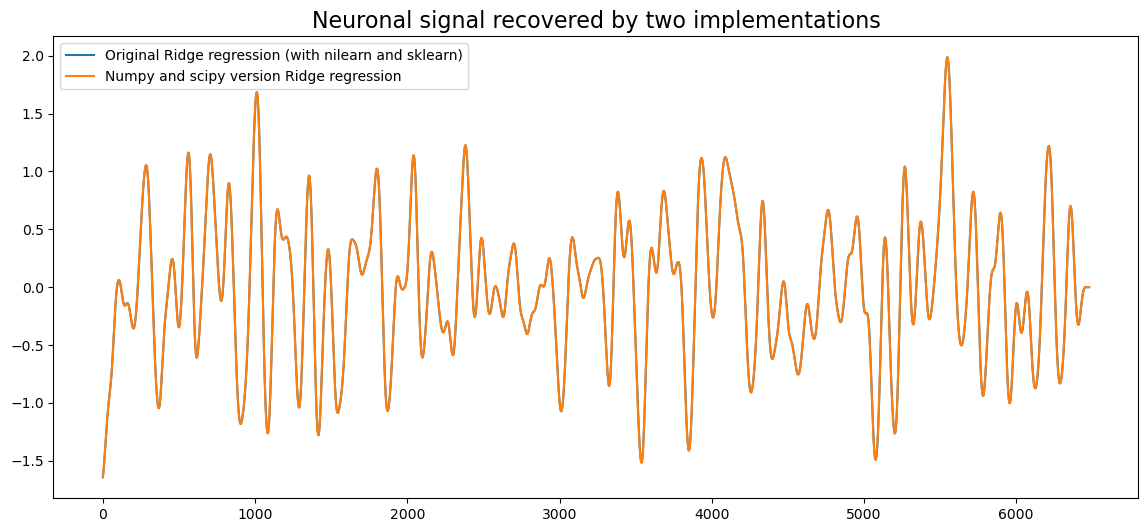

In [10]:
#сравнение двух функций
plt.figure(figsize=(14, 6))
plt.title(f'Neuronal signal recovered by two implementations',
                  fontsize=16)
neuro_ridge_regress = ridge_regress_deconvolution(BOLD, TR, alpha, NT)
neuro_ridge = ridge_deconvolution(BOLD, TR, alpha, NT)
r = pearsonr(neuro_ridge, neuro_ridge_regress.flatten()).correlation
plt.plot(neuro_ridge, label='Original Ridge regression (with nilearn and sklearn)')
plt.plot(neuro_ridge_regress, label = "Numpy and scipy version Ridge regression");
plt.legend();

In [11]:
%%timeit
neuro_ridge_regress = ridge_regress_deconvolution(BOLD, TR, alpha, NT)

281 ms ± 4.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit
neuro_ridge = ridge_deconvolution(BOLD, TR, alpha, NT)


354 ms ± 4.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
